# Hotel Analysis

## Overview

## Business Understanding

## Data Understanding

## Data Preparation

To complete the data preparations we will follow these steps:

- 1
- 2
- 3

### Data Cleaning

In [162]:
# Import necessary libraries to complete EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
%matplotlib inline

# Enable copy-on-write for dataframe in pandas
pd.options.mode.copy_on_write = True

# Suppress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [163]:
# Load the dataset into the notebook
df = pd.read_csv('data/booking.csv', encoding='latin-1')

In [164]:
# Preview the dataset
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [165]:
# View the df shape
print("Data shape:", df.shape)
print('\n')

# View the df info
print("Data info:")
df.info()

Data shape: (36285, 17)


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price           

Per the above information, we do not seem to have any missing values so we do not need to decide on an strategy on how to handle these values.

In [166]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [167]:
# Frequency tables for categorical features
print("\nCategorical features value counts:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for column: '{col}'")
    print(df[col].value_counts())


Categorical features value counts:

Value counts for column: 'Booking_ID'
Booking_ID
INN00001    1
INN24194    1
INN24188    1
INN24189    1
INN24190    1
           ..
INN12090    1
INN12089    1
INN12088    1
INN12087    1
INN36286    1
Name: count, Length: 36285, dtype: int64

Value counts for column: 'type of meal'
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

Value counts for column: 'room type'
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

Value counts for column: 'market segment type'
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Value counts for column: 'date of reservation'
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231

In [168]:
# Descriptive statistics for numerical features
print("\nNumerical features description:")
df.describe()


Numerical features description:


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


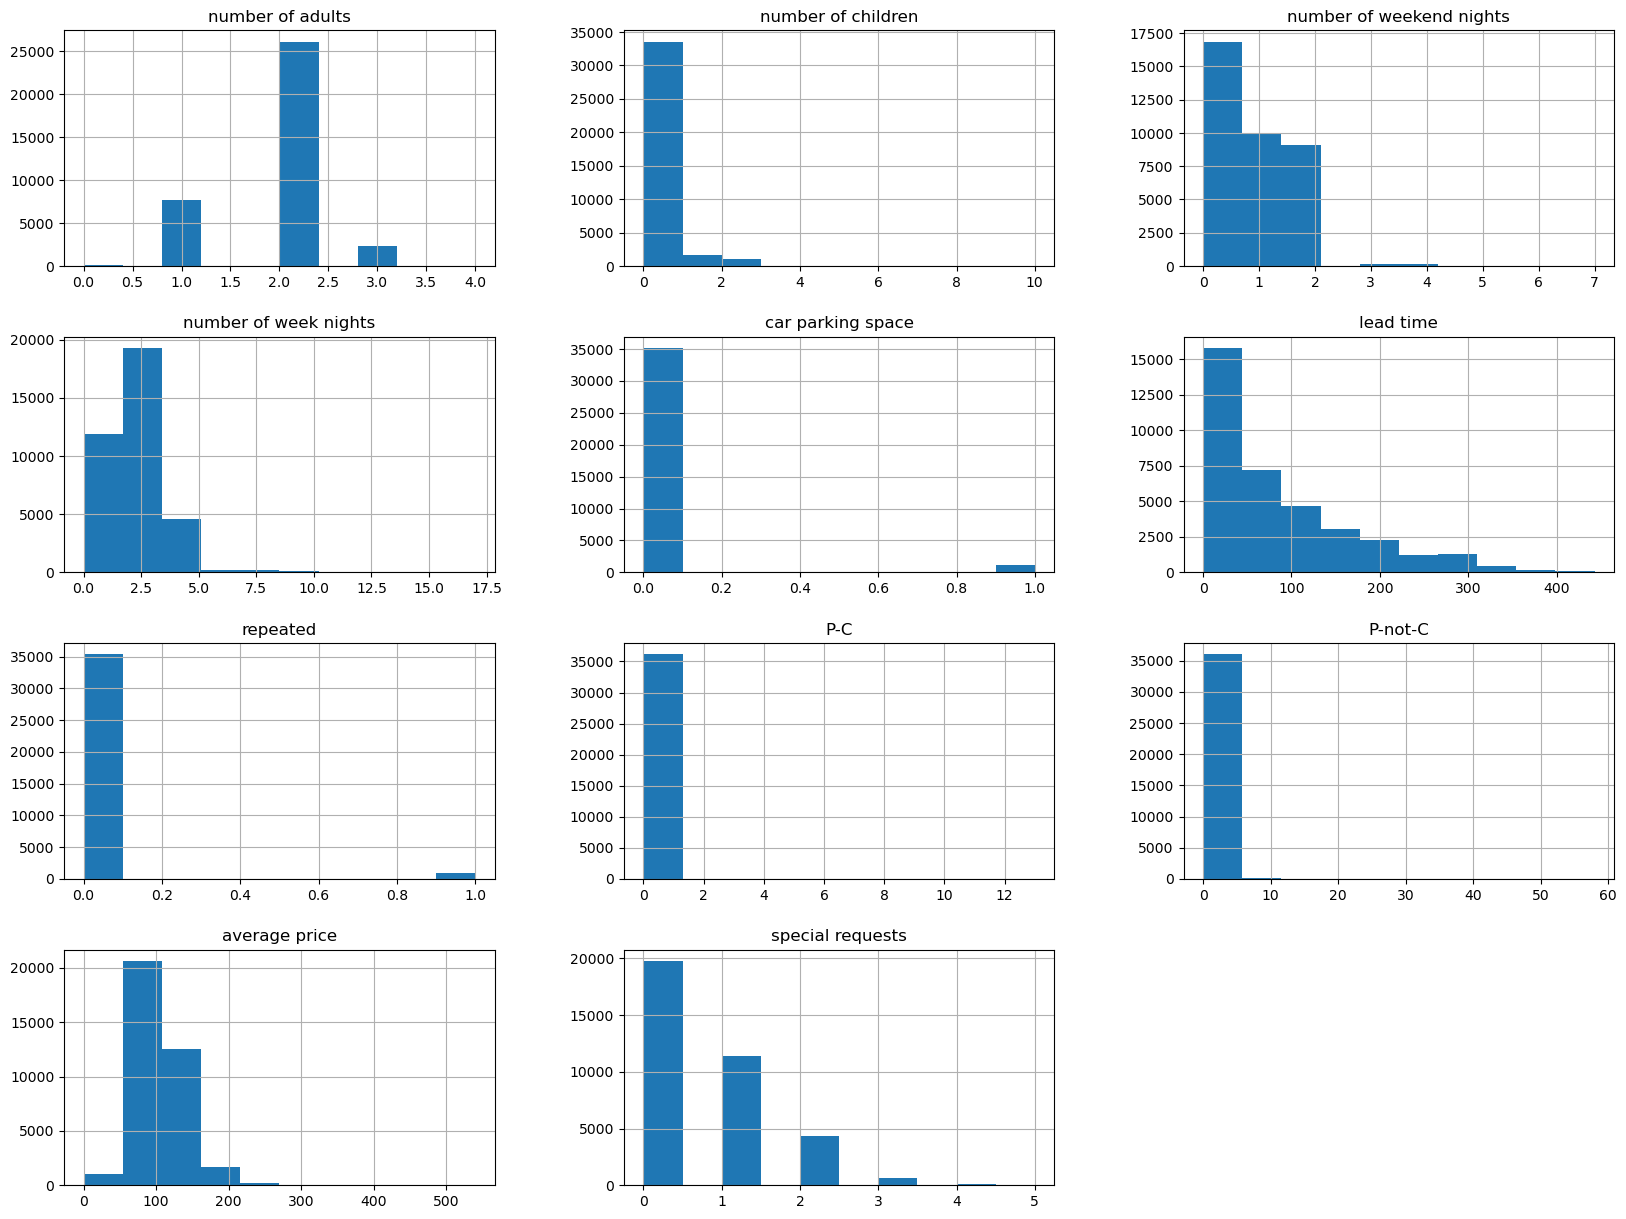

In [169]:
# Histograms for numerical features
df.hist(figsize=(20, 15));

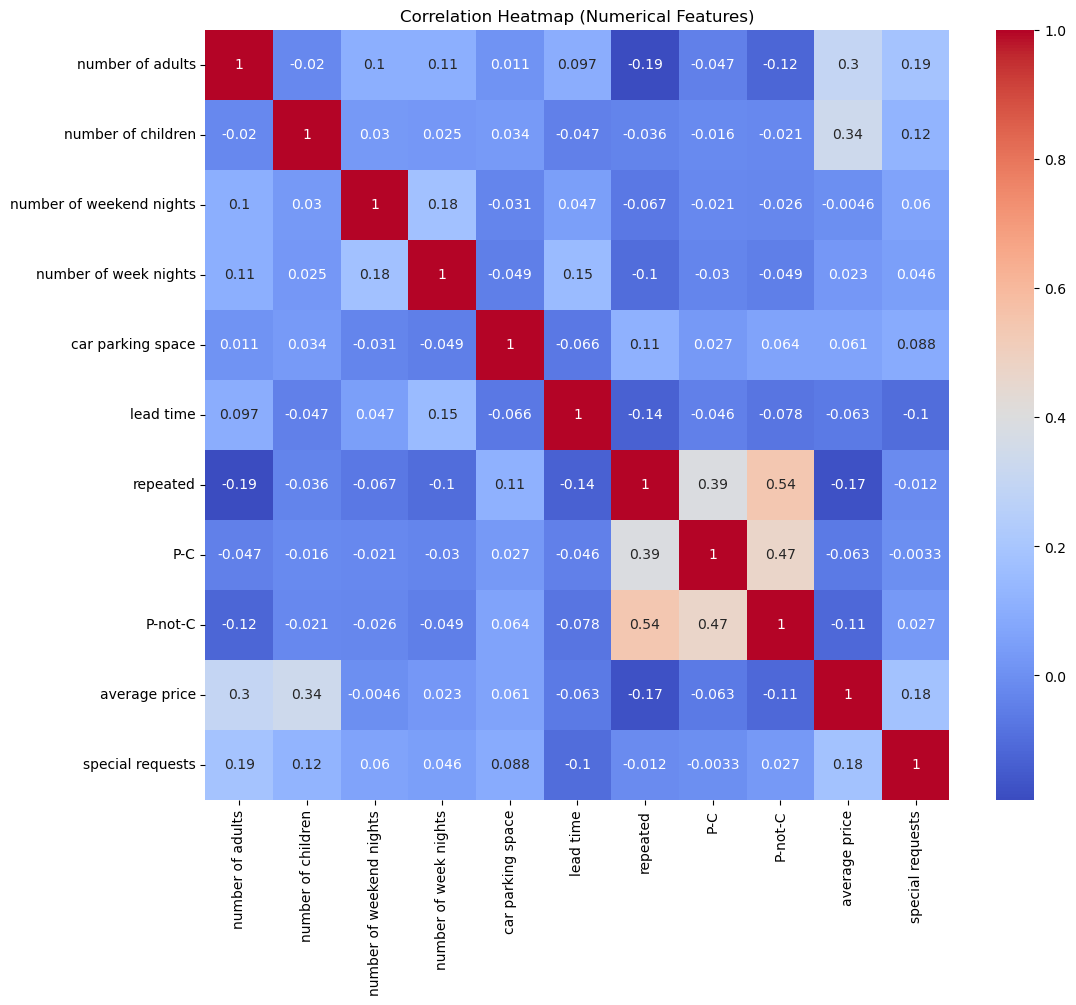

In [170]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)");
plt.show() 

### Data Preprocessing

In [171]:
#Convert the values in the target column to binary (0 or 1)
df['booking status'] = df['booking status'].replace({'Canceled': 1, 'Not_Canceled': 0}) 

In [172]:
# Use map to conditionally change the specific date
df['date of reservation'] = df['date of reservation'].map(lambda x: '2-28-2018' if x == '2018-2-29' else x)

In [173]:
# Convert the 'date' column to datetime format
df['date of reservation'] = pd.to_datetime(df['date of reservation'], format='mixed')

In [174]:
#Feature Engineering based on the 'date of reservation'
df['reservation_month'] = pd.to_datetime(df['date of reservation']).dt.month
df['reservation_year'] = pd.to_datetime(df['date of reservation']).dt.year
df['reservation_day_of_week'] = pd.to_datetime(df['date of reservation']).dt.dayofweek
df['reservation_month_year'] = pd.to_datetime(df['date of reservation']).dt.to_period('M')

In [175]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['reservation_season'] = df['reservation_month'].apply(get_season)

In [176]:
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df['reservation_quarter'] = df['reservation_month'].apply(get_quarter)

In [177]:
df["average price"] = df["average price"].round().astype(int)

In [178]:
#Dropping unnecessary columns
# Columns to drop
cols_to_drop = ['Booking_ID', 'date of reservation'] 

# Drop the columns
df = df.drop(columns=cols_to_drop)

### Encoding Categorical Columns

In [161]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)
df=df.replace({True: 1, False: 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype    
---  ------                             --------------  -----    
 0   number of adults                   36285 non-null  int64    
 1   number of children                 36285 non-null  int64    
 2   number of weekend nights           36285 non-null  int64    
 3   number of week nights              36285 non-null  int64    
 4   car parking space                  36285 non-null  int64    
 5   lead time                          36285 non-null  int64    
 6   repeated                           36285 non-null  int64    
 7   P-C                                36285 non-null  int64    
 8   P-not-C                            36285 non-null  int64    
 9   average price                      36285 non-null  int64    
 10  special requests                   36285 non-null  int64    
 11  booking status              

In [75]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,...,reservation_month_year_2018-03,reservation_month_year_2018-04,reservation_month_year_2018-05,reservation_month_year_2018-06,reservation_month_year_2018-07,reservation_month_year_2018-08,reservation_month_year_2018-09,reservation_month_year_2018-10,reservation_month_year_2018-11,reservation_month_year_2018-12
0,INN00001,1,1,2,5,0,224,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,INN00002,1,0,1,3,0,5,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,INN00003,2,1,1,3,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,INN00004,1,0,0,2,0,211,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,INN00005,1,0,1,2,0,48,0,0,0,...,False,True,False,False,False,False,False,False,False,False
